In [20]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from random import random

%matplotlib notebook

In [21]:
######## CONFIG ########
input_file = "input.txt"     # Location of input file (required)
output_file = "out.txt"      # Location of output file or 'None'

x_range = [-500, 500]        # Range of x or 'None'
y_range = [-500, 500]        # Range of y or 'None'
z_range = [-500, 500]        # Range of z or 'None'
########################

In [22]:
# Stolen from solver.py
def read_input(file_name):
    f = open(file_name, "r")
    n = int(f.readline())
    k = int(f.readline())

    points = []
    for line in f:
        points.append(tuple([int(v) for v in line.split()]))

    f.close()

    return n, k, points

In [23]:
def read_output(file_name):
    f = open(file_name, "r")
    max_distance = int(f.readline())
    
    i = 0
    cluster_ind_dict = defaultdict(list)
    for line in f.readlines():
        cluster_ind_dict[i] = [int(ind) - 1 for ind in line.split(" ")]
        i += 1
    return max_distance, cluster_ind_dict

<IPython.core.display.Javascript object>


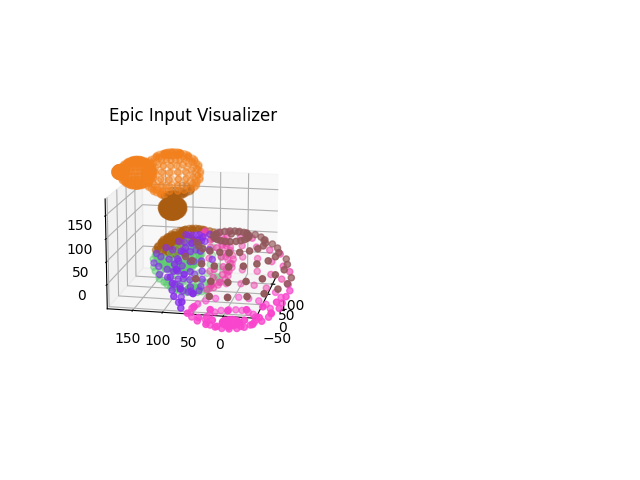

In [24]:
n, k, points = read_input(input_file)

del_list = []
if x_range is not None and y_range is not None and y_range is not None:
    for point_ind in range(len(points)):
        if x_range[0] <= points[point_ind][0] <= x_range[1] and y_range[0] <= points[point_ind][1] <= y_range[1] and z_range[0] <= points[point_ind][2] <= z_range[1]:
            continue
        del_list.append(point_ind)
    for ind in del_list[::-1]:
        points.pop(ind)

x = [point[0] for point in points]
y = [point[1] for point in points]
z = [point[2] for point in points]

fig = plt.figure()

if output_file is None:
    colors = ['blue' for _ in range(len(points))]
else:
    colors = []
    for cluster, inds in read_output(output_file)[1].items():
        color = (random(), random(), random())
        for ind in inds:
            fill = ind + 1 - len(colors)
            if fill > 0:
                colors = colors + [None] * fill
            colors[ind] = color
    for ind in del_list[::-1]:
        colors.pop(ind)
    
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.set_title("Epic Input Visualizer")
ax.scatter(x, y, z, color=colors)
plt.show()